In [1]:
###import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import preprocessing

In [2]:
###Adaline
class Ada_(object):
    
    def __init__(self, eta = 0.1, nterm = 50, rands = 1):
        self.eta = eta
        self.nterm = nterm
        self.rands = rands
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.rands)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.cost_ = []
        
        for i in range(self.nterm):
            output = self.n_input(x)
            error = y - output
            self.w_[1:] += self.eta * x.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            cost = (error ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
            
    def n_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.n_input(x) >= 0.0, 1, -1)

In [4]:
import os
import pandas as pd


df = pd.read_csv("C:/Users/teddy/Downloads/Machine Learning/Adeline Code/Titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [5]:
###drop unnecessary infomation by columns
df1 = df.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
df1.head()

Survived  Pclass                                          Name     Sex  \
0         0       3                              Kelly, Mr. James    male   
1         1       3              Wilkes, Mrs. James (Ellen Needs)  female   
2         0       2                     Myles, Mr. Thomas Francis    male   
3         0       3                              Wirz, Mr. Albert    male   
4         1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch  
0  34.5      0      0  
1  47.0      1      0  
2  62.0      0      0  
3  27.0      0      0  
4  22.0      1      1

In [1517]:
###Start Processing data

In [6]:
#Find out master or miss or mlle, then drop Name
def get_mmm(passenger):
    name = passenger
    if(   ('Master' in str(name)) \
       or ('Miss'   in str(name)) \
       or ('Mlle'   in str(name))):
        return 1
    else:
        return 0

df1['MMM'] = df1[['Name']].apply(get_mmm, axis = 1)
df1= df1.drop(['Name'], axis = 1)

In [1519]:
##Embarked

#Fill in the null with the most commen letter 'S'
#tit_df["Embarked"] = tit_df["Embarked"].fillna("S")

#Create dummy variables for Embarked
#emb_dummy_tit = pd.get_dummies(tit_df["Embarked"])
#emb_dummy_test = pd.get_dummies(test_df["Embarked"])

#tit_df = tit_df.join(emb_dummy_tit)
#test_df = test_df.join(emb_dummy_test)

#tit_df = tit_df.drop(["Embarked"], axis = 1)
#test_df = test_df.drop(["Embarked"], axis = 1)

c:\Users\teddy\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\teddy\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\teddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


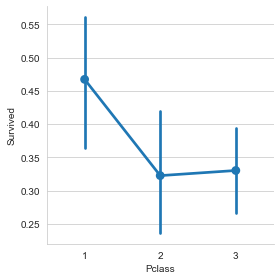

In [7]:
##Pclass

sns.factorplot('Pclass', 'Survived', order = [1,2,3], data = df1, size = 4)

#Create dummy variables for Pclass
pc_dummy_tit = pd.get_dummies(df1['Pclass'])


pc_dummy_tit.columns = ['Class_1', 'Class_2', 'Class_3']


df1 = df1.join(pc_dummy_tit)

In [8]:
##Sex

#Create dummy variables for Sex, then drop Sex
sex_dummy_tit = pd.get_dummies(df1['Sex'])


df1= df1.join(sex_dummy_tit)


df1 = df1.drop(['Sex'], axis = 1)


In [9]:
#Seperate passengers who has parent or children with passengers who doesn't
def Pch_sep(passenger):
    parch = passenger
    if(parch > 0):
        return 1
    else:
        return 0

df1['Parch'] = df1['Parch'].apply(Pch_sep)

In [1523]:
##Now I have the idea 
#Maybe the servival rate will be higher for children than for parents
#Because parents will try their best to let their children live
#Also high class passengers and female passengers should have more chance to survive

#So I make following assumption:
#Passengers' name with Master, Miss, Mlle should more likely to be children or teenagers
#If their Parch value is 1, means they should be child of someone
#So they may have a batter survival rate
print("Amound of people under each condition:")
table0e = pd.pivot_table(df1, values = 'Survived', \
                    index = ['Parch', 'female', 'MMM'], \
                    columns=['Pclass'], \
                    aggfunc='count')
print( table0e.iloc[::-1],'\n' )


print("Percent of survival under each condition:")
table0e = pd.pivot_table(df1, values = 'Survived', \
                    index = ['Parch', 'female', 'MMM'], \
                    columns=['Pclass'], \
                    aggfunc=np.mean

In [1524]:
##Age
#77 missing value in tit_df, 86 missing value in test_df
#Need to fill in the values
#Passengers with Master, Miss, and Melle are mostly children and teenagers
#Which means to fill in people who are MMM need a smaller random number
#Others will need larger random numbers

<AxesSubplot:xlabel='Age', ylabel='Survived'>

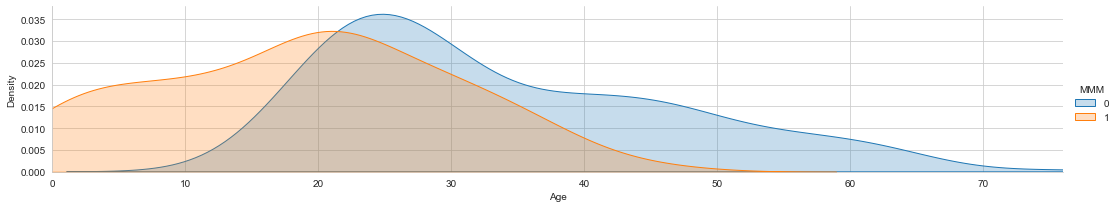

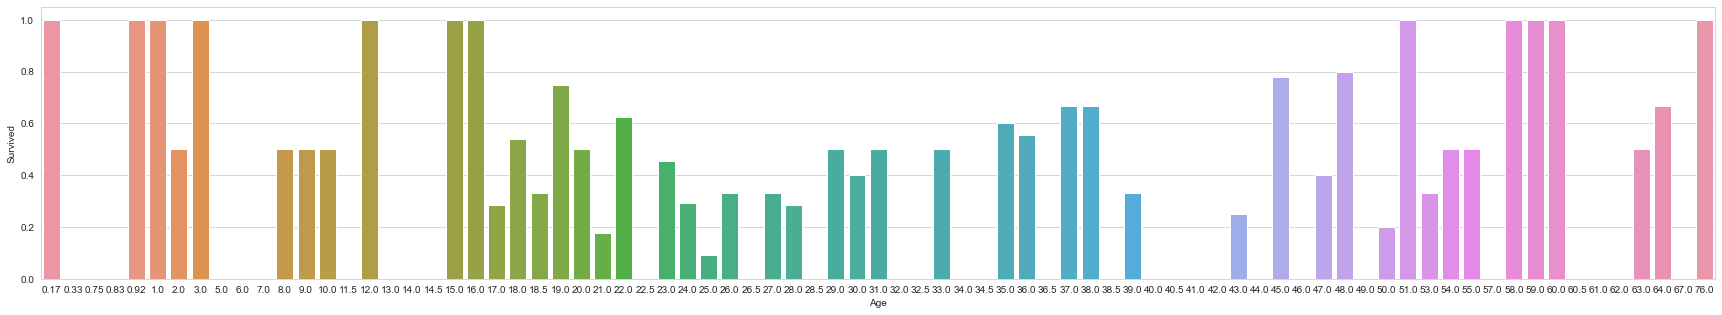

In [10]:
#Find the age distribution of MMM and non-MMM
facet = sns.FacetGrid(df1, hue = "MMM",aspect = 5)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, df1['Age'].max()))
facet.add_legend()


#Show average survived passengers by age
fig, axis1 = plt.subplots(1, 1, figsize = (30,5))
avg_age = df1[["Age", "Survived"]].groupby(['Age'], as_index = False).mean()
sns.barplot(x='Age', y='Survived', data = avg_age)

In [15]:
##SibSp

#Seperate passengers who has parent or children with passengers who doesn't
def Pch_sep(passenger):
    sibsp = passenger
    if(sibsp > 0):
        return 1
    else:
        return 0

df1['SibSp'] = df1['SibSp'].apply(Pch_sep)


print("Amound of people under each condition:")
table0e = pd.pivot_table(df1, values = 'Survived', \
                    index = ['SibSp', 'female'], \
                    columns=['Pclass'], \
                    aggfunc='count')
print( table0e.iloc[::-1],'\n' )

print("Percent of survival under each condition:")
table0e = pd.pivot_table(df1, values = 'Survived', \
                    index = ['SibSp', 'female'], \
                    columns=['Pclass'], \
                    aggfunc=np.mean)
print( table0e.iloc[::-1],'\n' )

Amound of people under each condition:
Pclass         1   2    3
SibSp female             
1     1       24  14   26
      0       22  17   32
0     1       26  16   46
      0       35  46  114 

Percent of survival under each condition:
Pclass        1  2  3
SibSp female         
1     1       1  1  1
      0       0  0  0
0     1       1  1  1
      0       0  0  0 



In [17]:
#It seems SibSp is not really the feature affecting survival rate

#Since most training data is 1 and 0
#In order to use Adline, data should not have very large differenc
#Which means age values are too extreme need to be rearange to between 0-1
def norm_age(x):
    age = x
    return age/80

df1['Age'] = df1['Age'].apply(norm_age)


#Finally drop column that are just used for preview datas: Pclass
#Also drop column that are not very much affecting their survival rates: SibSp
tit_df = df1.drop(['Pclass', 'SibSp'], axis = 1)


#Review data file
print(df1.head())


   Survived  Pclass      Age  SibSp  Parch  MMM  Class_1  Class_2  Class_3  \
0         0       3  0.43125      0      0    0        0        0        1   
1         1       3  0.58750      1      0    0        0        0        1   
2         0       2  0.77500      0      0    0        0        1        0   
3         0       3  0.33750      0      0    0        0        0        1   
4         1       3  0.27500      1      1    0        0        0        1   

   female  male  
0       0     1  
1       1     0  
2       0     1  
3       0     1  
4       1     0  


In [18]:
#define true class label & training data
y = tit_df.iloc[0:891, 0].values
y = np.where(y == 1, 1, -1)

x = tit_df.iloc[0:891, [1,8]].values

#read test data
x_t = df1.iloc[0:418, [1,8]].values

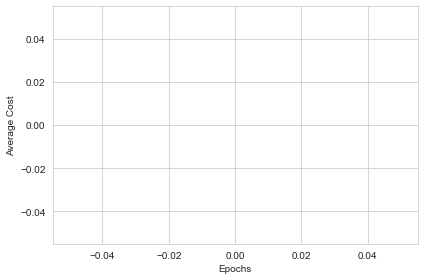

In [24]:
#train with adaline
ada_tit = Ada_(nterm = 200, eta = 0.001).fit(x, y)

#plot the training cost
plt.plot(range(1, len(ada_tit.cost_) + 1), ada_tit.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

### An object-oriented perceptron API

In [27]:
# Changes to books code below marked #LS

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors) #LS
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

xi:  [0.43125 1.     ] Target:  -1 Prediction:  1
xi:  [0.5875 0.    ] Target:  1 Prediction:  1
xi:  [0.775 1.   ] Target:  -1 Prediction:  1
xi:  [0.3375 1.    ] Target:  -1 Prediction:  0
xi:  [0.275 0.   ] Target:  1 Prediction:  0
xi:  [0.175 1.   ] Target:  -1 Prediction:  0
xi:  [0.375 0.   ] Target:  1 Prediction:  1
xi:  [0.325 1.   ] Target:  -1 Prediction:  0
xi:  [0.225 0.   ] Target:  1 Prediction:  0
xi:  [0.2625 1.    ] Target:  -1 Prediction:  0
xi:  [nan  1.] Target:  -1 Prediction:  0
xi:  [0.575 1.   ] Target:  -1 Prediction:  0
xi:  [0.2875 0.    ] Target:  1 Prediction:  0
xi:  [0.7875 1.    ] Target:  -1 Prediction:  0
xi:  [0.5875 0.    ] Target:  1 Prediction:  0
xi:  [0.3 0. ] Target:  1 Prediction:  0
xi:  [0.4375 1.    ] Target:  -1 Prediction:  0
xi:  [0.2625 1.    ] Target:  -1 Prediction:  0
xi:  [0.3375 0.    ] Target:  1 Prediction:  0
xi:  [0.5625 0.    ] Target:  1 Prediction:  0
xi:  [0.6875 1.    ] Target:  -1 Prediction:  0
xi:  [0.1125 1.    ] Targ

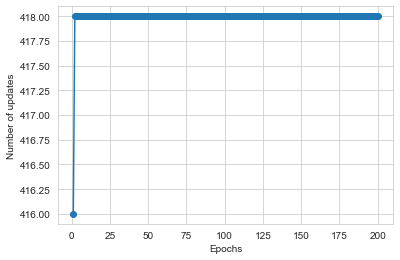

In [30]:
ppn = Perceptron(eta=0.001, n_iter=200)

ppn.fit(x, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()